# Método de Scipy para Sistemas de Ecuaciones

Considerando el sistema de ecuaciones diferenciales:

$$
\begin{aligned}
\frac{dx_1}{dt} &= - 2x_1^2 + 2x_1 + x_2 -1 \, x_1(0) = 2 \\
\frac{dx_2}{dt} &= -x_1 - 3x_2^2 + 2 x_2 +2 \, x_2(0) = 0
\end{aligned}
$$

Se puede resolver utilizando el paquete de `scipy`

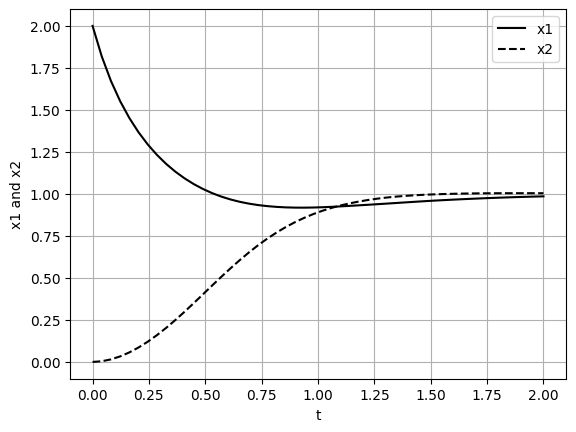

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def f(t,y):
    dy = np.zeros(2)
    dy[0] = -2*y[0]**2 + 2*y[0] + y[1] -1
    dy[1] = -y[0] -3*y[1]**2 +2*y[1] + 2
    return dy

tf = 2.
tspan = [0., tf]
teval = np.linspace(0., tf)
y0 = np.array([2., 0.])
result = solve_ivp(f,tspan,y0,t_eval=teval)
tm = result.t
x1 = result.y[0,:]
x2 = result.y[1,:]

plt.plot(tm,x1,c='k',label='x1')
plt.plot(tm,x2,c='k',ls='--',label='x2')
plt.grid()
plt.xlabel('t')
plt.ylabel('x1 and x2')
plt.legend()
plt.show()

In [3]:
# Define the system of ODEs to solve
# For this example, let's use a system of two ODEs:
# dy1/dx = y1 + 2y2
# dy2/dx = 3y1 + 4y2
def system_of_odes(x, y):
    y1, y2 = y
    dy1dx = y1 + 2*y2
    dy2dx = 3*y1 + 4*y2
    return [dy1dx, dy2dx]

# Runge-Kutta 4th Order method adapted for systems of ODEs
def runge_kutta_4_system(f, x0, y0, h, xn):
    # Calculate the number of iterations needed
    n = int((xn - x0) / h)
    
    # Initialize lists to store x and y values
    x = [x0]
    y = [list(y0)]  # Assuming y0 is a list of initial conditions for y1, y2, ...
    
    # Perform Runge-Kutta for system of ODEs
    for i in range(n):
        current_x = x[i]
        current_y = y[i]

        k1 = [h*dy for dy in f(current_x, current_y)]
        k2 = [h*dy for dy in f(current_x + h/2, [y + k1_i/2 for y, k1_i in zip(current_y, k1)])]
        k3 = [h*dy for dy in f(current_x + h/2, [y + k2_i/2 for y, k2_i in zip(current_y, k2)])]
        k4 = [h*dy for dy in f(current_x + h, [y + k3_i for y, k3_i in zip(current_y, k3)])]

        next_y = [y_i + (k1_i + 2*k2_i + 2*k3_i + k4_i) / 6 for y_i, k1_i, k2_i, k3_i, k4_i in zip(current_y, k1, k2, k3, k4)]
        
        x.append(current_x + h)
        y.append(next_y)
    
    return x, y

# Example usage with initial conditions and step size
x0 = 0      # Initial x value
y0 = [1, 1]  # Initial y values for y1 and y2
h = 0.1     # Step size
xn = 1      # Final x value

# Running the 4th-order Runge-Kutta method for a system of ODEs
x_values_rk4, y_values_rk4 = runge_kutta_4_system(system_of_odes, x0, y0, h, xn)

# Printing results
for i, (x_val, y_val) in enumerate(zip(x_values_rk4, y_values_rk4)):
    print(f"x_{i} = {x_val:.2f}, y1_{i} = {y_val[0]:.2f}, y2_{i} = {y_val[1]:.2f}")


x_0 = 0.00, y1_0 = 1.00, y2_0 = 1.00
x_1 = 0.10, y1_1 = 1.40, y2_1 = 1.92
x_2 = 0.20, y1_2 = 2.10, y2_2 = 3.49
x_3 = 0.30, y1_3 = 3.31, y2_3 = 6.17
x_4 = 0.40, y1_4 = 5.39, y2_4 = 10.75
x_5 = 0.50, y1_5 = 8.95, y2_5 = 18.58
x_6 = 0.60, y1_6 = 15.05, y2_6 = 31.96
x_7 = 0.70, y1_7 = 25.50, y2_7 = 54.84
x_8 = 0.80, y1_8 = 43.39, y2_8 = 93.99
x_9 = 0.90, y1_9 = 74.01, y2_9 = 160.95
x_10 = 1.00, y1_10 = 126.40, y2_10 = 275.52
